In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
# Define data directories
project_dir = '/Users/andrewweitz/_Stanford/year6/cs224n/project'
data_dir    = 'data/'
data_dir    = os.path.join(project_dir, data_dir)

dataset       = 'train'
answer_path   = os.path.join(data_dir, dataset + '.answer')
context_path  = os.path.join(data_dir, dataset + '.context')
question_path = os.path.join(data_dir, dataset + '.question')
span_path     = os.path.join(data_dir, dataset + '.span')

In [3]:
contexts = []
questions = []
answers = []

context_file, qn_file, ans_file = open(context_path), open(question_path), open(answer_path)
context_line, qn_line, ans_line = context_file.readline(), qn_file.readline(), ans_file.readline() # read the first line
while context_line and qn_line and ans_line: # while you haven't reached the end
    contexts.append(context_line)
    questions.append(qn_line)
    answers.append(ans_line)
    context_line, qn_line, ans_line = context_file.readline(), qn_file.readline(), ans_file.readline() # read the next line

spans = np.genfromtxt(os.path.join(data_dir,span_path)    , dtype='str', delimiter="\n")
spans = np.asarray([np.asarray(str.split(x),int) for x in spans])

In [4]:
# # Read in data as text strings
# answers   = np.genfromtxt(os.path.join(data_dir,answer_fname)  , dtype='str', delimiter="\n")
# contexts  = np.genfromtxt(os.path.join(data_dir,context_fname) , dtype='str', delimiter="\n")
# questions = np.genfromtxt(os.path.join(data_dir,question_fname), dtype='str', delimiter="\n")

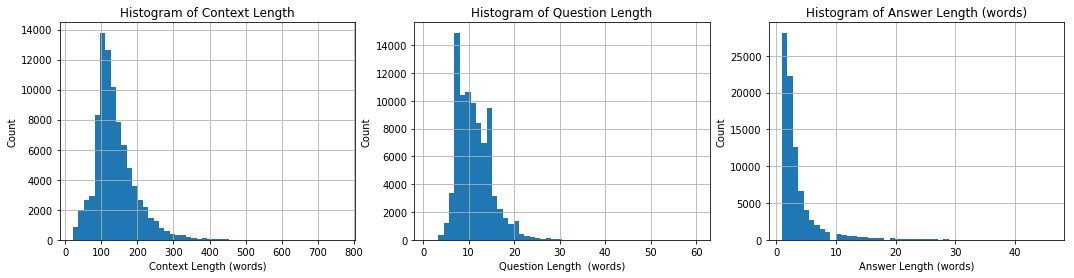

In [9]:
# Make histograms of question/answer/contexts lengths

N = len(contexts)
answer_lengths   = [len(str.split(x)) for x in answers]
context_lengths  = [len(str.split(x)) for x in contexts]
question_lengths = [len(str.split(x)) for x in questions]

plt.figure(figsize=(18, 4))

plt.subplot(1,3,1)
plt.hist(context_lengths,50)
plt.xlabel('Context Length (words)')
plt.title('Histogram of Context Length')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(question_lengths,50)
plt.xlabel('Question Length  (words)')
plt.title('Histogram of Question Length')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(answer_lengths,50)
plt.xlabel('Answer Length (words)')
plt.title('Histogram of Answer Length (words)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

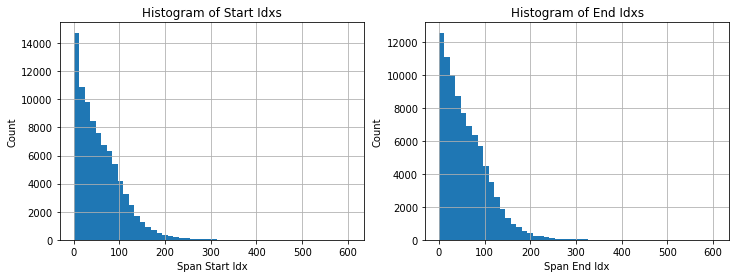

In [6]:
# Make histograms of span indices
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(spans[:,0],50)
plt.xlabel('Span Start Idx')
plt.ylabel('Count')
plt.title('Histogram of Start Idxs')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(spans[:,1],50)
plt.xlabel('Span End Idx')
plt.title('Histogram of End Idxs')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [7]:
# Test that data has been read-in correctly
context_index = 100
print(questions[context_index])
print(answers[context_index])
print(spans[context_index])
print(str.split(contexts[context_index])[spans[context_index][0]:(spans[context_index][1]+1)])

how old was the village site found near the santa cruz river ?

2100 bc

[35 36]
['2100', 'bc']


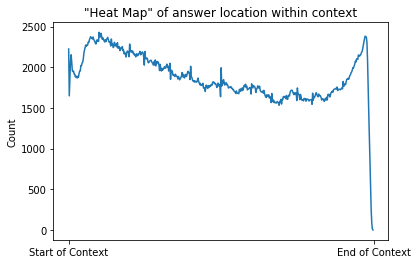

In [8]:
# Where in the context is the answer likely to appear?
numcols = 500
answer_prob = np.zeros((N,numcols))
for cnt, (context_length, span) in enumerate(zip(context_lengths, spans)):
    answer_loc = (numcols*span/float(context_length)).astype(int)
    answer_prob[cnt,answer_loc[0]:(answer_loc[1]+1)] = 1

plt.plot(np.sum(answer_prob,axis=0))
plt.ylabel('Count')
plt.xticks([0, numcols], ('Start of Context', 'End of Context') )
plt.title('"Heat Map" of answer location within context')
plt.show()

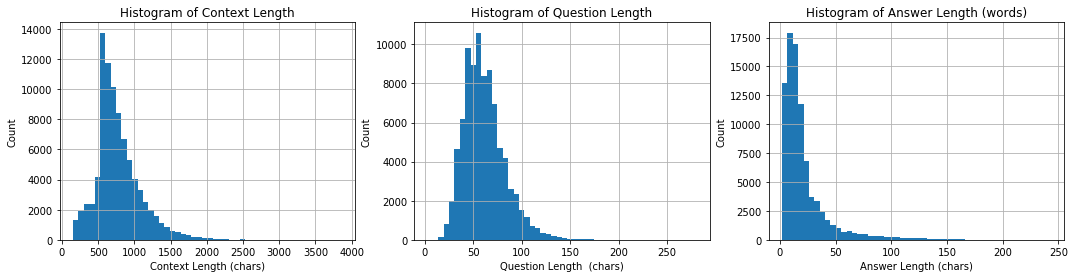

In [12]:
# Make histograms of question/answer/contexts lengths

N = len(contexts)
answer_lengths_chars   = [len(x) for x in answers]
context_lengths_chars  = [len(x) for x in contexts]
question_lengths_chars = [len(x) for x in questions]

plt.figure(figsize=(18, 4))

plt.subplot(1,3,1)
plt.hist(context_lengths_chars,50)
plt.xlabel('Context Length (chars)')
plt.title('Histogram of Context Length')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(question_lengths_chars,50)
plt.xlabel('Question Length  (chars)')
plt.title('Histogram of Question Length')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(answer_lengths_chars,50)
plt.xlabel('Answer Length (chars)')
plt.title('Histogram of Answer Length (words)')
plt.ylabel('Count')
plt.grid(True)
plt.show()